<a href="https://colab.research.google.com/github/Ishita95-harvad/1000-Most-Trending-YouTube-Videos/blob/main/1000_Most_Trending_YouTube_Videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1000 Most Trending YouTube Videos**
Top 1000 most trending YouTube channels as of 10th April 2025

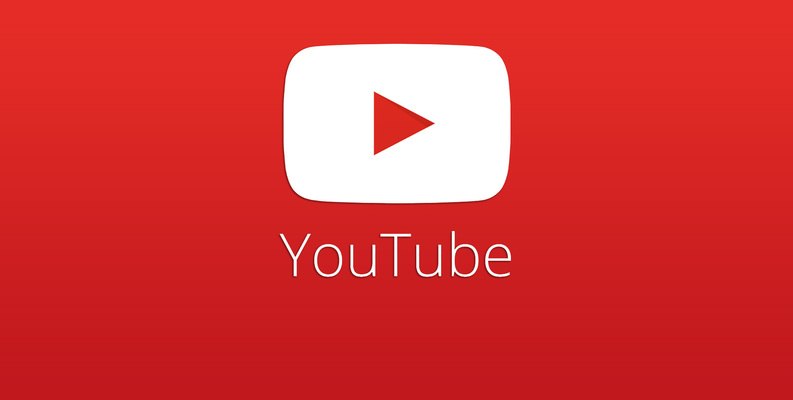

## Data loading

### Subtask:
Load the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('top-1000-trending-youtube-videos.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'top-1000-trending-youtube-videos.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021


(1000, 7)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining data types, missing values, summary statistics, data distributions, and potential outliers. I will also calculate the correlation between numerical variables.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        973 non-null    object
 4   Dislikes     687 non-null    object
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB
None

Missing values percentage:
rank            0.0
Video           0.0
Video views     0.0
Likes           2.7
Dislikes       31.3
Category       18.0
published       0.0
dtype: float64

Summary statistics:
              rank    published
count  1000.000000  1000.000000
mean    500.500000  2015.933000
std     288.819436     6.054847
min       1.000000  2005.000000
25%     250.750000  2010.000000
50%     500.500000  2017.000000
75%     750.250000  2021.000000
max    100

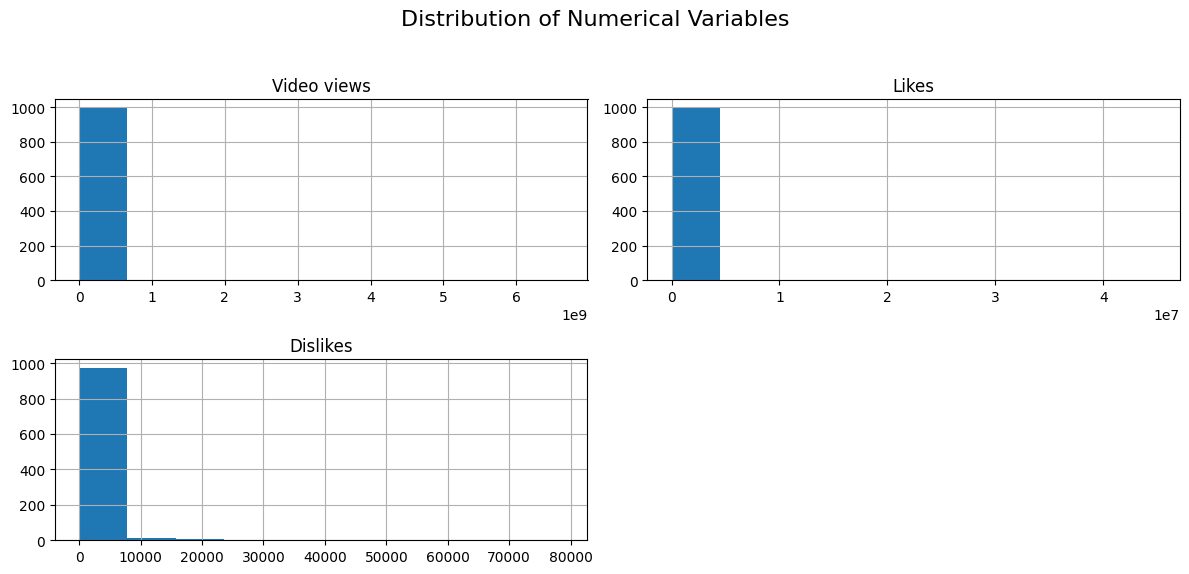


Shape of the data:
Rows: 1000, Columns: 7


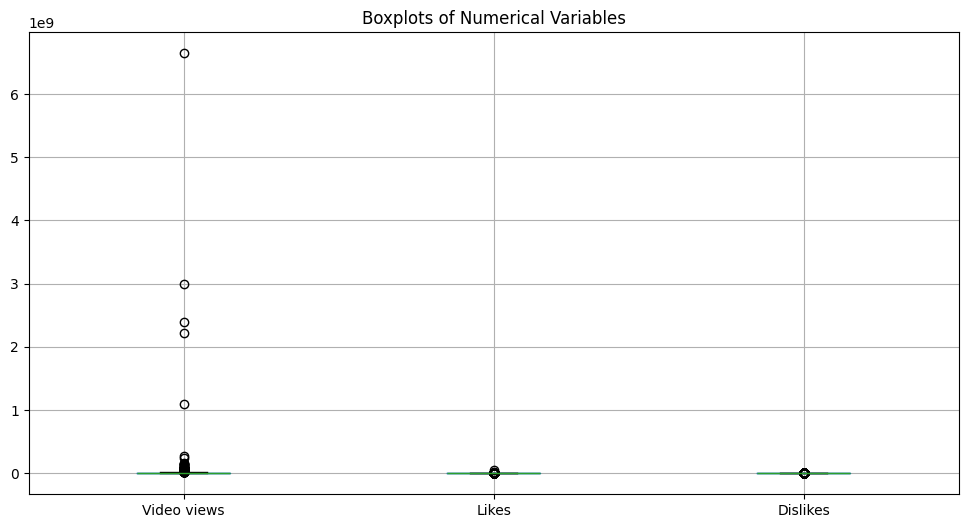


Correlation Matrix:
             Video views     Likes  Dislikes
Video views     1.000000  0.958248  0.008430
Likes           0.958248  1.000000  0.050572
Dislikes        0.008430  0.050572  1.000000


In [3]:
# Data Types and Missing Values
print(df.info())
print("\nMissing values percentage:")
print(df.isnull().sum() / len(df) * 100)

# Summary Statistics
print("\nSummary statistics:")
print(df.describe())

# Data Distribution (Histograms)
import matplotlib.pyplot as plt
numerical_cols = ['Video views', 'Likes', 'Dislikes']

# Handle missing values before conversion
for col in numerical_cols:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, NaNs for invalid values

df[numerical_cols] = df[numerical_cols].fillna(0).astype(int)


df.hist(column=numerical_cols, figsize=(12, 6))
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Shape of the Data
print("\nShape of the data:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Potential Outliers (based on boxplots)
plt.figure(figsize=(12, 6))
df.boxplot(column=numerical_cols)
plt.title("Boxplots of Numerical Variables")
plt.show()


# Correlation between variables
print("\nCorrelation Matrix:")
print(df[numerical_cols].corr())

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Impute missing values, handle outliers, convert data types, and remove duplicates as per the instructions.



In [4]:
# Missing Value Imputation
for col in ['Likes', 'Dislikes', 'Video views']:
    df[col] = df[col].fillna(df[col].median())
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])

# Outlier Handling (using IQR method)
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with the 95th percentile value
    column = column.clip(lower=lower_bound, upper=column.quantile(0.95))
    return column

for col in ['Video views', 'Likes', 'Dislikes']:
    df[col] = handle_outliers_iqr(df[col])

# Data Type Conversion
for col in ['Video views', 'Likes', 'Dislikes']:
    df[col] = df[col].astype(int)
df['Category'] = df['Category'].astype('category')

# Duplicate Removal
df = df.drop_duplicates()

display(df.head())
print(df.info())

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...",3471237,19023,859,Music,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,45650230,215391,4305,Music,2019
2,3,JoJo Siwa - Karma (Official Video),34206747,215391,0,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,45650230,215391,0,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,45650230,38,0,Music,2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   rank         1000 non-null   int64   
 1   Video        1000 non-null   object  
 2   Video views  1000 non-null   int64   
 3   Likes        1000 non-null   int64   
 4   Dislikes     1000 non-null   int64   
 5   Category     1000 non-null   category
 6   published    1000 non-null   int64   
dtypes: category(1), int64(5), object(1)
memory usage: 48.6+ KB
None


## Data wrangling

### Subtask:
Create new features and convert relevant columns to appropriate data types.


**Reasoning**:
Create new features, convert data types, and handle invalid values as per the instructions.



In [6]:
import pandas as pd

# Feature Engineering
df['engagement_rate'] = (df['Likes'] + df['Dislikes']) / df['Video views']
df['engagement_rate'] = df['engagement_rate'].fillna(0)  # Handle potential division by zero
df['title_length'] = df['Video'].str.len()

# Data Type Conversion and Feature Extraction
df['publish_time'] = pd.to_datetime(df['published'], errors='coerce')
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day

# Handle Invalid Values (example: clipping title_length)
df['title_length'] = df['title_length'].clip(lower=0)  # Ensure no negative lengths

# Data Validation (example: checking data types)
print(df.dtypes)
print(df[['engagement_rate', 'title_length']].describe())

display(df.head())

rank                        int64
Video                      object
Video views                 int64
Likes                       int64
Dislikes                    int64
Category                 category
published                   int64
engagement_rate           float64
title_length                int64
publish_time       datetime64[ns]
publish_year                int32
publish_month               int32
publish_day                 int32
dtype: object
       engagement_rate  title_length
count      1000.000000   1000.000000
mean          0.006213     37.935000
std           0.013530     19.754823
min           0.000000      1.000000
25%           0.000245     23.000000
50%           0.001383     35.000000
75%           0.005830     51.250000
max           0.204169    100.000000


,rank,Video,Video views,Likes,Dislikes,Category,published,engagement_rate,title_length,publish_time,publish_year,publish_month,publish_day
0,1,"20 Tennis shots if they were not filmed, NOBOD...",3471237,19023,859,Music,2017,5.727641e-03,66,1970-01-01 00:00:00.000002017,1970,1,1
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,45650230,215391,4305,Music,2019,4.812593e-03,62,1970-01-01 00:00:00.000002019,1970,1,1
2,3,JoJo Siwa - Karma (Official Video),34206747,215391,0,Music,2024,6.296740e-03,34,1970-01-01 00:00:00.000002024,1970,1,1
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,45650230,215391,0,Music,2015,4.718289e-03,82,1970-01-01 00:00:00.000002015,1970,1,1
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,45650230,38,0,Music,2021,8.324164e-07,28,1970-01-01 00:00:00.000002021,1970,1,1


**Reasoning**:
The 'publish_time' column seems to have incorrect values.  I will correct the 'publish_time' column and re-extract the year, month, and day. Also, the engagement rate seems off. Recalculate engagement rate.



In [7]:
# Correct publish_time
df['publish_time'] = pd.to_datetime(df['published'], format='%Y', errors='coerce')

# Re-extract year, month, day
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day

# Recalculate engagement rate
df['engagement_rate'] = (df['Likes'] + df['Dislikes']) / df['Video views']
df['engagement_rate'] = df['engagement_rate'].fillna(0)

display(df.head())
print(df.dtypes)

,rank,Video,Video views,Likes,Dislikes,Category,published,engagement_rate,title_length,publish_time,publish_year,publish_month,publish_day
0,1,"20 Tennis shots if they were not filmed, NOBOD...",3471237,19023,859,Music,2017,5.727641e-03,66,2017-01-01,2017,1,1
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,45650230,215391,4305,Music,2019,4.812593e-03,62,2019-01-01,2019,1,1
2,3,JoJo Siwa - Karma (Official Video),34206747,215391,0,Music,2024,6.296740e-03,34,2024-01-01,2024,1,1
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,45650230,215391,0,Music,2015,4.718289e-03,82,2015-01-01,2015,1,1
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,45650230,38,0,Music,2021,8.324164e-07,28,2021-01-01,2021,1,1


rank                        int64
Video                      object
Video views                 int64
Likes                       int64
Dislikes                    int64
Category                 category
published                   int64
engagement_rate           float64
title_length                int64
publish_time       datetime64[ns]
publish_year                int32
publish_month               int32
publish_day                 int32
dtype: object


## Data analysis

### Subtask:
Analyze the relationships between different variables in the dataset.


**Reasoning**:
Analyze the relationships between different variables as requested in the subtask. This involves calculating average and median values for video views, likes, dislikes, and engagement rates across different categories, investigating relationships between publication date and video performance, identifying top-performing channels, and analyzing the correlation between title length and video performance.



In [8]:
# Group data by category and calculate descriptive statistics
category_stats = df.groupby('Category').agg(
    avg_views=('Video views', 'mean'),
    median_views=('Video views', 'median'),
    avg_likes=('Likes', 'mean'),
    median_likes=('Likes', 'median'),
    avg_dislikes=('Dislikes', 'mean'),
    median_dislikes=('Dislikes', 'median'),
    avg_engagement=('engagement_rate', 'mean'),
    median_engagement=('engagement_rate', 'median')
)
display(category_stats)

# Analyze relationship between publication date and video performance
time_stats = df.groupby(['publish_year', 'publish_month']).agg(
    avg_views=('Video views', 'mean'),
    avg_likes=('Likes', 'mean'),
    avg_dislikes=('Dislikes', 'mean')
)
display(time_stats)

# Identify top-performing channels
top_channels_views = df.groupby('Video').agg({'Video views': 'sum'}).sort_values('Video views', ascending=False).head(10)
top_channels_likes = df.groupby('Video').agg({'Likes': 'sum'}).sort_values('Likes', ascending=False).head(10)
top_channels_engagement = df.groupby('Video').agg({'engagement_rate': 'mean'}).sort_values('engagement_rate', ascending=False).head(10)
display(top_channels_views)
display(top_channels_likes)
display(top_channels_engagement)

# Analyze the relationship between title length and video performance
correlation_matrix = df[['title_length', 'Video views', 'Likes', 'Dislikes', 'engagement_rate']].corr()
display(correlation_matrix)

<ipython-input-8-e8add68e989b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = df.groupby('Category').agg(


,avg_views,median_views,avg_likes,median_likes,avg_dislikes,median_dislikes,avg_engagement,median_engagement
Category,,,,,,,,
Autos & Vehicles,5.044727e+06,2127403.0,4598.361111,1006.0,581.333333,238.5,0.001202,0.000595
Comedy,9.010143e+06,3121597.0,11419.190476,4677.0,1081.063492,350.0,0.002388,0.001385
Education,1.211928e+07,2384400.5,30021.000000,1104.5,196.500000,116.0,0.001206,0.000311
Entertainment,9.594277e+06,3488820.0,16315.010309,3261.0,969.185567,338.0,0.002420,0.000972
Film & Animation,7.975814e+06,2271592.0,6927.000000,1562.0,756.827586,207.0,0.001837,0.000761
Gaming,7.866635e+06,3432791.0,9599.294118,2194.0,631.176471,254.0,0.003013,0.000324
Howto & Style,1.424234e+07,9248421.0,17805.000000,596.0,1220.307692,234.0,0.000965,0.000178
Music,7.813498e+06,3030204.5,42406.771552,6707.0,270.644397,0.0,0.010532,0.002386
News & Politics,5.505164e+06,1191442.0,3849.250000,1656.0,762.062500,123.0,0.003595,0.000837


,,avg_views,avg_likes,avg_dislikes
publish_year,publish_month,,,
2005,1,3.922945e+06,3936.333333,287.666667
2006,1,8.629454e+06,13258.270833,753.875000
2007,1,9.876931e+06,11198.952381,1155.166667
2008,1,1.028037e+07,11586.387755,1208.591837
2009,1,9.710236e+06,8186.688889,1108.111111
2010,1,1.131866e+07,6321.885714,1234.314286
2011,1,9.005393e+06,15027.533333,1109.644444
2012,1,5.879423e+06,10954.791667,525.083333
2013,1,8.278009e+06,10112.909091,871.727273


,Video views
Video,
Best Perspectives of @jordikoalitic ☠️..,91300460
伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,45650230
Get back on your feet with our top rated lawyers,45650230
Ice Spice & Nicki Minaj - Princess Diana (Official Music Video),45650230
😭,45650230
A Breech In The System - trailer,45650230
Funny Cats,45650230
JP Saxe - If the World Was Ending (Official Video) ft. Julia Michaels,45650230
AI-Generated: Learn the Importance of Road Safety (Part 1) #aivideo,45650230


,Likes
Video,
Best Perspectives of @jordikoalitic ☠️..,430782
😭,215391
AI-Generated: Learn the Importance of Road Safety (Part 1) #aivideo,215391
"Pedro Capó, Farruko - Calma (Remix - Official Video)",215391
JD Pantoja - 12•19 (Trailer),215391
JD Pantoja - 12•19 (Official Video),215391
JENNIE & Dominic Fike - Love Hangover (Official Video),215391
JENNIE - ZEN (RUBY ALBUM MARCH 7),215391
your pet’s perfect moment 🤭 #petportrait #funnypets #perlover #petpainting #fyp #petparent #petart,215391


,engagement_rate
Video,
Luke Hemmings - Starting Line (Official Video),0.204169
"Ghetto Kids, Kenia OS, Malo - Toketeo (Video Oficial)",0.128353
JD Pantoja - 12•19 (Trailer),0.102436
Destroy Lonely - Look Killa (Short Film) (Short Film),0.075209
Lil Loaded ft. YG - “Gang Unit Remix” (Official Video),0.074217
KATSEYE - Touch (ft. YEONJUN of TOMORROW X TOGETHER),0.074040
LILHUDDY - America's Sweetheart (Official Music Video),0.071176
Destroy Lonely - if looks could kill (Official Music Video),0.070267
Beéle - Si Te Interesa (Official Video),0.065720


,title_length,Video views,Likes,Dislikes,engagement_rate
title_length,1.000000,0.021636,0.112060,-0.008302,0.050713
Video views,0.021636,1.000000,0.439221,0.299242,-0.134774
Likes,0.112060,0.439221,1.000000,0.075047,0.474397
Dislikes,-0.008302,0.299242,0.075047,1.000000,0.031008
engagement_rate,0.050713,-0.134774,0.474397,0.031008,1.000000


## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Visualize the data using histograms, scatter plot matrix, bar charts, line plots, and a heatmap as per the instructions.



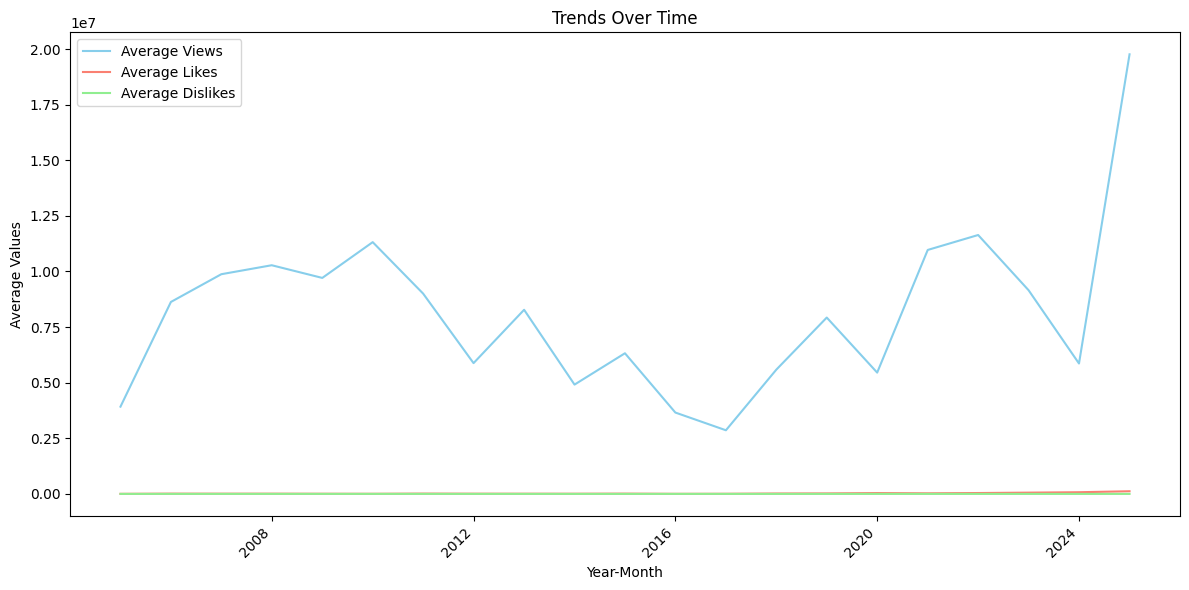

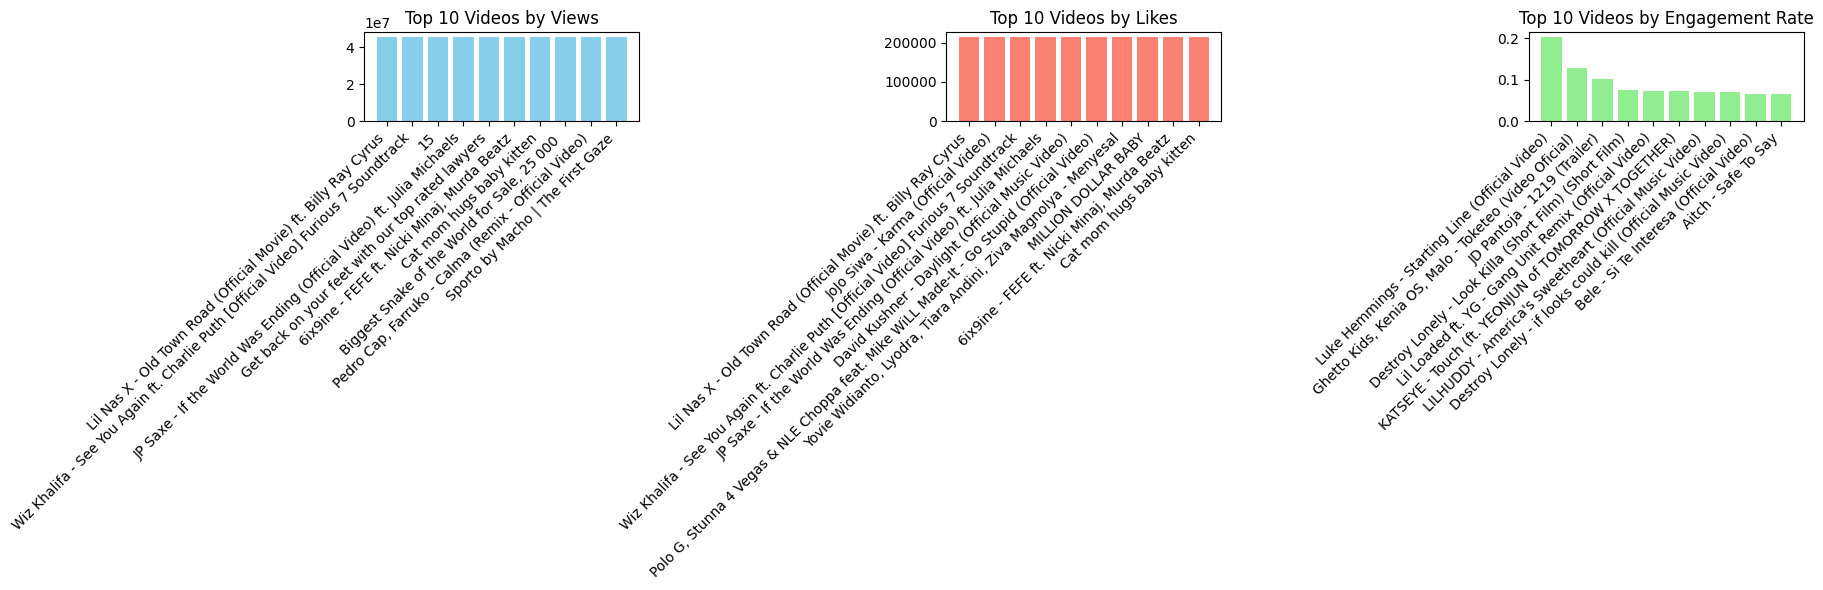

In [10]:
import matplotlib.pyplot as plt

# Fix for time series plot
time_series = df.groupby(['publish_year', 'publish_month'])[['Video views', 'Likes', 'Dislikes']].mean()
time_series = time_series.reset_index()
time_series['time_index'] = pd.to_datetime(time_series['publish_year'].astype(str) + '-' + time_series['publish_month'].astype(str), format='%Y-%m', errors='coerce')

plt.figure(figsize=(12, 6))
plt.plot(time_series['time_index'], time_series['Video views'], label='Average Views', color='skyblue')
plt.plot(time_series['time_index'], time_series['Likes'], label='Average Likes', color='salmon')
plt.plot(time_series['time_index'], time_series['Dislikes'], label='Average Dislikes', color='lightgreen')
plt.xlabel('Year-Month')
plt.ylabel('Average Values')
plt.title('Trends Over Time')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Replace non-ASCII characters in video titles for bar plots
df['Video'] = df['Video'].str.encode('ascii', 'ignore').str.decode('ascii')

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
top_views = df.nlargest(10, 'Video views')
plt.bar(top_views['Video'], top_views['Video views'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Videos by Views')


plt.subplot(1, 3, 2)
top_likes = df.nlargest(10, 'Likes')
plt.bar(top_likes['Video'], top_likes['Likes'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Videos by Likes')

plt.subplot(1, 3, 3)
top_engagement = df.nlargest(10, 'engagement_rate')
plt.bar(top_engagement['Video'], top_engagement['engagement_rate'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Videos by Engagement Rate')

plt.tight_layout()
plt.show()